# (baseline development) Glass per M2 Calculations


Based on ITRPV numbers for the most part, this journal attempts to correlate front glass thickness values with the introduction of glass-glass modules.

Standard front glass thickness is set to 3.2 mm, based on ITRPV 2014, 2012 and 2011. Starting 2017, front glass are divided into >3 mm, 2-3 mm. Assuming that >3mm is still 3.2 mm. Thinner modules in the range of 2-3mm coincide with the values of Glass-Glass modules, so we are assuming all thiner modules have a backside of same thickness as front of 2.5 mm

So overall thickness of glass per panel goes from 3.2 to 5 mm for Glass-backsheet to Glass-Glass modules.


In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

cwd = os.getcwd() #grabs current working directory
skipcols = ['Source', 'Source.1']
density_glass = 2500*1000 # g/m^3    


#### Up to 2012

In [2]:

thickness_glass = 0.0032  # m
glassperm2 = thickness_glass * density_glass
print("Glass g/m2 up to 2012:", glassperm2)

Glass g/m2 up to 2012: 8000.0


#### 2013 - 2016

Glass-Glass percentage starts to increase over the following years. 

On ITRPV, percentage for 2013 is 98% glass-backsheet,
percentage for 2014 is 96 % glass-backsheet
percentage for 2016 is 97 % glass -backsheet.

We think it's strange that the % of glass-glass modules went suddenly up in 2014 and then back down in 2016. However we're going ahead with this percentages and will quantify this disaprity as uncertainty with the MC analysis.

Data is not available on Glass-Glass modules for 2015 so we're interpolating between previous year

In [3]:
#2013
thickness_glass = 0.0032 * 0.98 + (0.0032+0.0032)*0.02 # m
glassperm2 = thickness_glass * density_glass
print("Glass g/m2 2013:", glassperm2)

Glass g/m2 2013: 8160.0


In [4]:
#2014
thickness_glass = 0.0032 * 0.96 + (0.0032+0.0032)*0.04 # m
glassperm2 = thickness_glass * density_glass
print("Glass for 2014:", glassperm2)

Glass for 2014: 8320.0


In [5]:
#2015
thickness_glass = 0.0032 * 0.965 + (0.0032+0.0032)*0.035 # m
glassperm2 = thickness_glass * density_glass
print("Glass g/m2 2015:", glassperm2)

Glass g/m2 2015: 8280.0


In [6]:
#2016 
thickness_glass = 0.0032 * 0.97 + (0.0032+0.0032)*0.03 # m
glassperm2 = thickness_glass * density_glass
print("Glass g/m2 2016:", glassperm2)

Glass g/m2 2016: 8240.0


#### 2017 onwards

Starting 2017, ITRPV includes data on modules with Front glass between 2-3mm thick. Data is also available in various years for the percentage of modules that are Glass-Backsheet, vs Glass-Glass. The percentages for 2-3mm and Glass-Glass modules are very similar. We're assuming that 100% of the Glass-Glass modules are therefore 2-3mm thick for their front AND their back glass. Remaining percentage (if any) of 2-3mm front glasses are assumed to be Glass-backsheet.
For example for 2017:

![ITRPV Glass thicknesses deduction example](../images_wiki/ITRPV_GlassDeduction.PNG)


In [7]:
#2017
thickness_glass = 0.0032 * (0.94 + 0.01) + (0.0025+0.0025)*0.05 # m
glassperm2 = thickness_glass * density_glass
print("2017:", glassperm2)

2017: 8225.000000000002


Years afer 2017 that don't have values for any these two categories got interpolated.

## Calculations of glassper m2 using ITRPV projections

Typically, glass-glass modules use 2 different sheets of glass on the front and back. The frontside thickness has slowly but steadily decreased, as recorded by ITRPVs. The back side glass is typically thinner or equal to the front side; here we will assume it is of equal thickness. 

In [13]:
glass_raw = pd.read_csv(cwd+"/../../PV_ICE/baselines/SupportingMaterial/Marketshare_glass.csv", 
                           index_col='Year', usecols=lambda x: x not in skipcols)
print(glass_raw)

      glass-backsheet  glass-glass  foil-foil  3pt2mm  gtr3mm  2to3mm  less2mm
Year                                                                          
1995              NaN          NaN        NaN     NaN     NaN     NaN      NaN
1996              NaN          NaN        NaN     NaN     NaN     NaN      NaN
1997              NaN          NaN        NaN     NaN     NaN     NaN      NaN
1998              NaN          NaN        NaN     NaN     NaN     NaN      NaN
1999              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2000              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2001              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2002              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2003              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2004              NaN          NaN        NaN     NaN     NaN     NaN      NaN
2005              NaN          NaN        NaN     Na

## Calculations for increasing fraction of glass-glass to 50% by 2030 (hold through 2050)

Text(0.5, 1.0, 'marketshares of glass-backsheet and glass-glass')

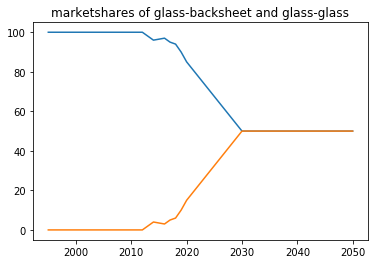

In [72]:
#We would like to predict 50% glass-glass by 2030, and hold at 50% glass-glass through 2050
#collect only historical data on conformation
history_glass = glass_raw.loc[(glass_raw.index<=2020),['glass-backsheet','glass-glass']]

#create an empty df to append to historical data, populate with our projections
yrs = pd.Series(index=range(2021,2051), dtype='float64')
tempdf = pd.DataFrame(yrs, columns=['glass-backsheet'])
tempdf['glass-glass'] = tempdf['glass-backsheet']#creates a new NaN column - IMPROVE THIS METHOD

tempdf['glass-glass'].loc[2030] = 50
tempdf['glass-backsheet'].loc[2030] = 50

#Now append history to placeholder
halfglass2030 = pd.concat([history_glass,tempdf])

#set values in 2012 to all glass-backsheet - REMOVE THIS LINE WHEN BETTER DATA
halfglass2030['glass-backsheet'].loc[2012] = 100
halfglass2030['glass-glass'].loc[2012] = 0

#And interpolate for values.
halfglass2030proj = halfglass2030.interpolate(limit_direction='both')
#print(halfglass2030proj)
#check that percents add to 100
#check = pd.DataFrame(halfglass2030proj.agg("sum", axis="columns"))
#print(check)

plt.plot(halfglass2030proj)
plt.title('marketshares of glass-backsheet and glass-glass')

We are going to take the glass thickness projections from ITRPV through 2030, and then hold constant through 2050. We will assume the greater than 3 mm thickness to be 3.2mm (as stated before), and we will assume less than 2mm thickness is 1.8mm.

C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'marketshares of 3 different glass thicknesses')

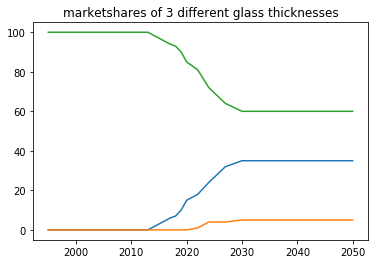

In [67]:
#subset glass raw down to only thickness data
glass_thick = glass_raw.filter(regex = 'mm')

#combine 3.2mm column and greater than 3mm column together
glass_thick['assume3pt2mm'] = glass_thick.pop('3pt2mm').fillna(glass_thick.pop('gtr3mm')).astype(float)

#set the 2-3mm 2013 datapoint to 0 (i.e. everything was 3.2mm)
glass_thick['2to3mm'].loc[2013] = 0.0

#interpolate
glass_thick_full = glass_thick.interpolate(limit_direction='both')

#check that percents add to 100
#check = pd.DataFrame(glass_thick_full.agg("sum", axis="columns"))

plt.plot(glass_thick_full)
plt.title('marketshares of 3 different glass thicknesses')
#print(glass_thick_full)

Text(0.5, 1.0, 'Weighted average glass thickness (front and back) in mm')

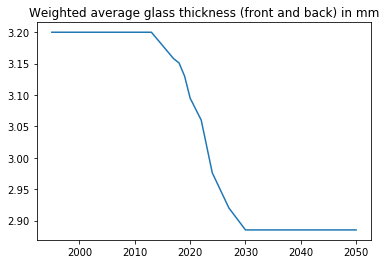

In [62]:
thicknesses = {'assume3pt2mm':3.2,
            '2to3mm':2.5,
            'less2mm':1.8} #dictionary of the glass thicknesses
glass_thick_percs = glass_thick_full/100

#Multiply each marketshare by the thickness of glass
wtd_glass_thick_split = glass_thick_percs.mul(thicknesses,'columns')
wtd_glass_thick = pd.DataFrame(wtd_glass_thick_split.agg("sum", axis="columns"))
wtd_glass_thick.columns = ['avg_glass_thickness_mm']

#print(wtd_glass_thick)
plt.plot(wtd_glass_thick)
plt.title('Weighted average glass thickness (front and back) in mm')

Now we have the weighted average thickness of glass annually, as well as the marketshares of glass-backsheet and glass-glass module conformation. These will be combined to determine a glass mass per module m^2 annually for 50% glass-glass by 2030.

In [91]:
#convert to % marketshare 
halfglass2030_percs = halfglass2030proj/100

#eqn = density glass * mm to m * [(mrktshr g-g * 2 * avg glass thickmm )+ (mrktshr g-b * 1 * avg glass thick)]
mass_glass = density_glass*(0.001)*((halfglass2030_percs['glass-glass']*2*wtd_glass_thick['avg_glass_thickness_mm']) + (halfglass2030_percs['glass-backsheet']*wtd_glass_thick['avg_glass_thickness_mm']))
#print(mass_glass)
#print out to a csv
glass_pm2 = pd.DataFrame(mass_glass)
glass_pm2.to_csv(cwd+'/../../PV_ICE/baselines/SupportingMaterial/output_glass_g_per_m2_projection.csv', index=True)

(7500, 11000)

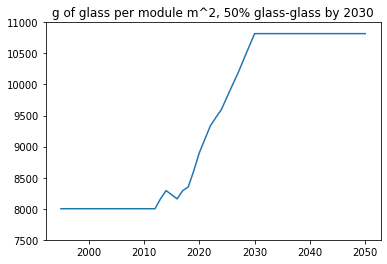

In [93]:
plt.plot(mass_glass)
plt.title('g of glass per module m^2, 50% glass-glass by 2030')
plt.ylim([7500,11000])

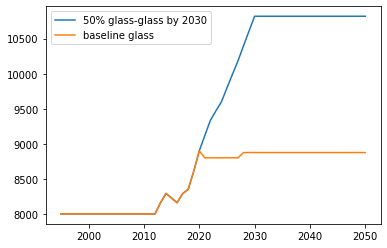

In [99]:
#For comparison, here is what we previously had for predictions
glass_baseline = pd.read_csv(cwd+"/../../PV_ICE/baselines/baseline_material_glass.csv", skiprows=[1])
#print(glass_baseline)
plt.plot(mass_glass, label='50% glass-glass by 2030')
plt.plot(glass_baseline['year'], glass_baseline['mat_massperm2'], label='baseline glass')
plt.legend()